___
# Ciência dos Dados - PROJETO 1

Gabriel Scodiero

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [111]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/gabiuas


In [112]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [113]:
dados13 = pd.read_csv('DOM2013csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados14 = pd.read_csv('DOM2014csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados15 = pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

DS=pd.read_csv('Data_13S.csv',sep=';')
DN=pd.read_csv('Data_13N.csv',sep=';')

In [114]:
#DS.sort_values(by="internet_dom").dropna().head(10)

In [115]:
#DN.sort_values(by="internet_dom").head(10)

In [132]:
df13= pd.DataFrame({"UF":dados13.UF})


#COLUNAS
df13['internet_dom']=dados13.V02322
df13['micro']=dados13.V02323
df13['celular']=dados13.V02324
df13['tablet']=dados13.V02325
df13['tv']=dados13.V02326
df13['outro']=dados13.V02327
df13['mes_domici']=dados13.V4614
df13['dom_per_capt']=dados13.V4622


#RESPOSTAS
df13.internet_dom = df13.internet_dom.astype('category')
df13.internet_dom.cat.categories = ('Sim','Não')

df13.micro = df13.micro.astype('category')
df13.micro.cat.categories = ('Sim','Não')

df13.celular = df13.celular.astype('category')
df13.celular.cat.categories = ('Sim','Não')

df13.tablet = df13.tablet.astype('category')
df13.tablet.cat.categories = ('Sim','Não')

df13.tv = df13.tv.astype('category')
df13.tv.cat.categories = ('Sim','Não')

df13.outro = df13.outro.astype('category')
df13.outro.cat.categories = ('Sim','Não')

df13.dom_per_capt = df13.dom_per_capt.astype('category')
df13.dom_per_capt.cat.categories = ('Zero','Zero - 1/4','1/4 - 1/2','1/2 - 1','1 - 2','2 - 3','3 - 5','5+','SD')


df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].sort_values(by="mes_domici").dropna().head()





,UF,internet_dom,micro,celular,tablet,tv,outro,mes_domici,dom_per_capt
66368,31,Sim,Sim,Sim,Não,Não,Não,30.0,Zero - 1/4
80927,33,Sim,Sim,Não,Não,Não,Não,33.0,Zero - 1/4
77159,31,Sim,Sim,Sim,Não,Não,Não,34.0,Zero - 1/4
75948,31,Sim,Sim,Não,Não,Não,Não,38.0,Zero - 1/4
104737,35,Sim,Sim,Não,Não,Não,Não,38.0,Zero - 1/4


In [117]:
inter = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].internet_dom
domsal = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].dom_per_capt



#print('Frequências relativas Internet:')
#ut1 = (inter.value_counts(normalize=True)*100).round(decimals=1).reindex(['Sim', 'Não'])
#print(ut1,'\n')

#print('Frequências relativas dinheiro:')
#ut2 = (domsal.value_counts(normalize=True)*100).round(decimals=1).reindex(['Zero','Zero - 1/4','1/4 - 1/2','1/2 - 1','1 - 2','2 - 3','3 - 5','5+','SD'])
#print(ut2,'\n')


In [118]:
#plot = ut1.plot(kind='bar',title='INTERNET',figsize=(6, 6),color=('g','r'))
#plt.ylabel('Pessoas(em%)')
#plt.xlabel('Internet no domicílio')

In [133]:
#plot = ut2.plot(kind='bar',title='SALÁRIO',figsize=(6, 6),color=('b'))
#plt.ylabel('Porcentagem Pessoas (em%)')
#plt.xlabel('Parcela Salário Mínimo')

In [134]:
inter = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].internet_dom
sal = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].dom_per_capt


#print('Tabela Cruzada por total GERAL (em %):')
ct1=(pd.crosstab(sal,inter,margins=True,rownames=['Salário'], colnames=["Internet"], normalize='all')*100).round(decimals=1)
#ct1

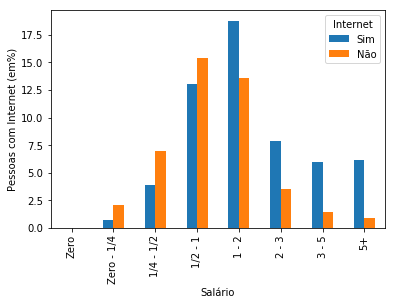

In [135]:
plot = ct1.iloc[0:8,0:2].plot(kind='bar')
plt.ylabel('Pessoas com Internet (em%)')

In [136]:
renda = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].mes_domici  

#renda.describe()

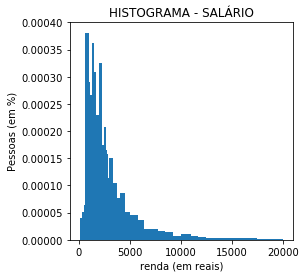

In [137]:
# Histograma
faixa = arange(0,30000,350)
faixa2 = (100,300,500,650,1000,1100,1250,1500,1700,2000,2250,2500,2700,2800,2900,3000,3400,3700,4000,4500,5000,5800,6400,7000,7800,8500,9200,10000,11000,11700,12500,15000,17500,20000)
plot = renda.plot.hist(bins=faixa2,title='HISTOGRAMA - SALÁRIO',figsize=(4, 4), normed=1, alpha=1)
plt.ylabel('Pessoas (em %)')
plt.xlabel('renda (em reais)')
#Curva assimetrica a direita

In [144]:
df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].sort_values(by="mes_domici").dropna().head()


,UF,internet_dom,micro,celular,tablet,tv,outro,mes_domici,dom_per_capt
66368,31,Sim,Sim,Sim,Não,Não,Não,30.0,Zero - 1/4
80927,33,Sim,Sim,Não,Não,Não,Não,33.0,Zero - 1/4
77159,31,Sim,Sim,Sim,Não,Não,Não,34.0,Zero - 1/4
75948,31,Sim,Sim,Não,Não,Não,Não,38.0,Zero - 1/4
104737,35,Sim,Sim,Não,Não,Não,Não,38.0,Zero - 1/4


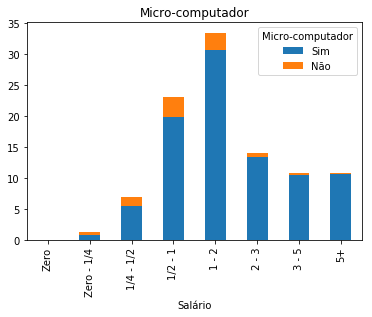

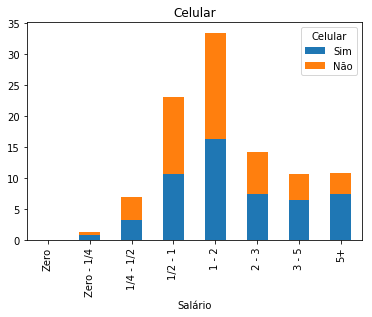

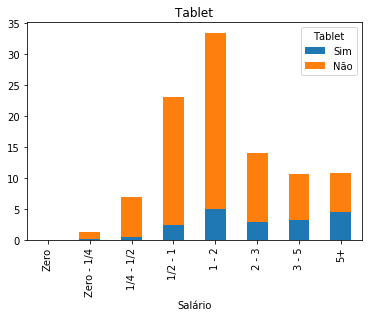

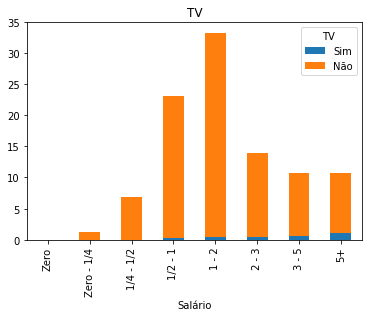

In [156]:
sal = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].dom_per_capt

micro = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].micro
celular = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].celular
tablet = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].tablet
tv = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].tv
outro = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].outro



ct2=(pd.crosstab(sal,micro,margins=True,rownames=['Salário'], colnames=["Micro-computador"], normalize='all')*100).round(decimals=1)
ct3=(pd.crosstab(sal,celular,margins=True,rownames=['Salário'], colnames=["Celular"], normalize='all')*100).round(decimals=1)
ct4=(pd.crosstab(sal,tablet,margins=True,rownames=['Salário'], colnames=["Tablet"], normalize='all')*100).round(decimals=1)
ct5=(pd.crosstab(sal,tv,margins=True,rownames=['Salário'], colnames=["TV"], normalize='all')*100).round(decimals=1)

plot = ct2.iloc[0:8,0:2].plot(kind='bar', stacked=True,title='Micro-computador')
plot = ct3.iloc[0:8,0:2].plot(kind='bar', stacked=True,title='Celular')
plot = ct4.iloc[0:8,0:2].plot(kind='bar', stacked=True,title='Tablet')
plot = ct5.iloc[0:8,0:2].plot(kind='bar', stacked=True,title='TV')



## ## Conclusão 

Descreva aqui suas conclusões!

Como o acesso, da população do Sudeste, a internet, varia conforme sua renda?

Por qual ferramenta a população do Sudeste acessa a internet?

Qual o tipo de internet a populacão usa?

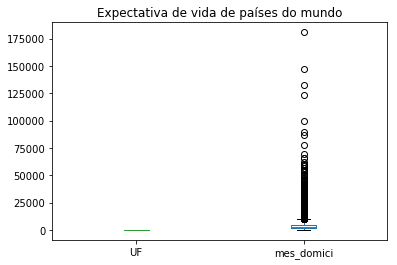

In [142]:
ds=df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)&(df13.internet_dom=="Sim")]    
dn=df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)&(df13.internet_dom=="Não")]


plot = ds.plot(kind='box',title='Expectativa de vida de países do mundo')#, color='red')







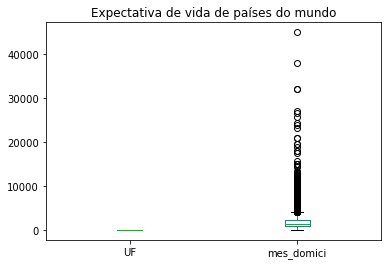

In [143]:
plot = dn.plot(kind='box',title='Expectativa de vida de países do mundo')#, color='red')


In [108]:
ds.to_csv("Data_13S.csv",sep=';')

In [109]:
dn.to_csv("Data_13N.csv",sep=';')

In [110]:
df13.to_csv("Data_13.csv",sep=';')